# Optimización de Hyper-parámetros

Prácticamente todos los algoritmos de aprendizaje automático tienen una serie de parámetros que regulan la forma en la cual son entrenados. Por convención, los mismos son llamados hyper-parámetros, para diferenciarlos de los que el modelo aprende como función de los datos de entrenamiento.  

En líneas generales, el modelado de un problema predictivo puede separase en tres etapas:

1. Determinación del Modelo y del algoritmo de entrenamiento
2. Determinación de los hyper-parámetros del algoritmo / modelo
3. Determinación de los parámetros del modelo

Si bien "algoritmo de aprendizaje" y "modelo" suelen usarse con el mismo significado, por su estrecha relación, en términos rigurosos, son dos conceptos separados. El modelo es una abstracción matemática de la realidad mientras que el algoritmo es la receta para encontrar los parámetros del modelo. Por ejemplo, un modelo es la regresión logística, sobre el cual existen una cantidad de algoritmos de entrenamiento que, en esencia, son distintos métodos numéricos de optimización de funciones. 

Una vez seleccionados modelo y algoritmo, se deben determinar ciertos hyper-parámetros. Algunos de ellos son propios del modelo y otros de algoritmo de aprendizaje. Por ejemplo, la profundidad máxima de un árbol de decisión es un hyper-parámetro del modelo, mientras que la función de pérdida (gini o entropía) corresponde al algoritmo. 

Finalmente, los parámetros del modelo son justamente los que determina el algoritmo de entrenamiento.


### Métodos de optimización

Existen esencialmente tres formas de encarar la optimización de hyper-parámetros

1. búsqueda exhaustiva (gridsearch)
2. búsqueda aleatoria (random search)
3. otros métodos más "inteligentes" (por ejemplo, optimización bayesiana)

La búsqueda exhaustiva consiste en explorar los más posible el espacio de hyper-parámetros para encontrar el óptimo, se lo puede ver como un método de fuerza bruta. Sólo es viable si cada evaluación funcional es "barata", computacionalmente hablando. 

La búsqueda aleatoria, consiste en tomar muestras al azar del espacio de hp, teniendo la expectativa de que se puede llegar a un valor lo suficientemente cercano al óptimo sin tener que explorar el espacio completo. Este método pretende llegar a un resultado similar al anterior, pero con muchas menos evaluaciones funcionales. Una de las lecturas del teorema de "no free lunch" implica que, si tomamos todos los posibles problemas de optimización, en promedio, ningún método encontrará el óptimo más rápido que la búsqueda al azar. O, dicho de otra manera, no existe ningún algoritmo de búsqueda más eficiente que la búsqueda al azar para todos los posibles problemas de optimización. 

Los demás métodos "inteligentes" pretenden encontrar el óptimo más rápidamente pero, de acuerdo con el teorema de no free lunch, son realmente más rápidos en un subconjunto de los problemas.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
sns.set()

In [3]:
#setup para el notebook

%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/Argentan/DMA_LAB2/master/data/titanic_proc.csv", index_col="PassengerId")

X = data.drop("Survived", axis=1)
y = data["Survived"]

## Busqueda exhaustiva

In [5]:
folds = [[tr, te] for tr, te in StratifiedKFold(3).split(X, y)]

def sample_score(params):
    C = 10 ** params[0]
    gamma = 10 ** params[1]
    print("*"*10)
    print("haciendo", C, gamma)
    res = cross_val_score(SVC(C=C, gamma=gamma),
                           X=X, y=y, scoring='roc_auc', cv=folds).mean()
    print("el resultado fue", res)
    return res

In [6]:
lambdas = np.linspace(5, -5, 5)
gammas = np.linspace(7, -7, 5)

In [7]:
gammas

array([ 7. ,  3.5,  0. , -3.5, -7. ])

In [8]:
param_grid = np.array([[C, gamma] for gamma in gammas for C in lambdas])
param_grid

array([[ 5. ,  7. ],
       [ 2.5,  7. ],
       [ 0. ,  7. ],
       [-2.5,  7. ],
       [-5. ,  7. ],
       [ 5. ,  3.5],
       [ 2.5,  3.5],
       [ 0. ,  3.5],
       [-2.5,  3.5],
       [-5. ,  3.5],
       [ 5. ,  0. ],
       [ 2.5,  0. ],
       [ 0. ,  0. ],
       [-2.5,  0. ],
       [-5. ,  0. ],
       [ 5. , -3.5],
       [ 2.5, -3.5],
       [ 0. , -3.5],
       [-2.5, -3.5],
       [-5. , -3.5],
       [ 5. , -7. ],
       [ 2.5, -7. ],
       [ 0. , -7. ],
       [-2.5, -7. ],
       [-5. , -7. ]])

In [9]:
# tomamos el producto cartesiano entre los dos arrays de parametros
param_grid = np.array([[C, gamma] for gamma in gammas for C in lambdas])

real_loss = [sample_score(params) for params in param_grid]

# el máximo está en:
optima = param_grid[np.array(real_loss).argmax(), :]
optima

**********
haciendo 100000.0 10000000.0
el resultado fue 0.5261400313169079
**********
haciendo 316.22776601683796 10000000.0
el resultado fue 0.5261400313169079
**********
haciendo 1.0 10000000.0
el resultado fue 0.5261400313169079
**********
haciendo 0.0031622776601683794 10000000.0
el resultado fue 0.5261400313169079
**********
haciendo 1e-05 10000000.0
el resultado fue 0.5226248681813824
**********
haciendo 100000.0 3162.2776601683795
el resultado fue 0.5261400313169079
**********
haciendo 316.22776601683796 3162.2776601683795
el resultado fue 0.5261400313169079
**********
haciendo 1.0 3162.2776601683795
el resultado fue 0.5261400313169079
**********
haciendo 0.0031622776601683794 3162.2776601683795
el resultado fue 0.5261400313169079
**********
haciendo 1e-05 3162.2776601683795
el resultado fue 0.5226248681813824
**********
haciendo 100000.0 1.0
el resultado fue 0.5619387722493848
**********
haciendo 316.22776601683796 1.0
el resultado fue 0.5619387722493848
**********
haciendo 1.

array([ 5., -7.])

## Busqueda Aleatoria

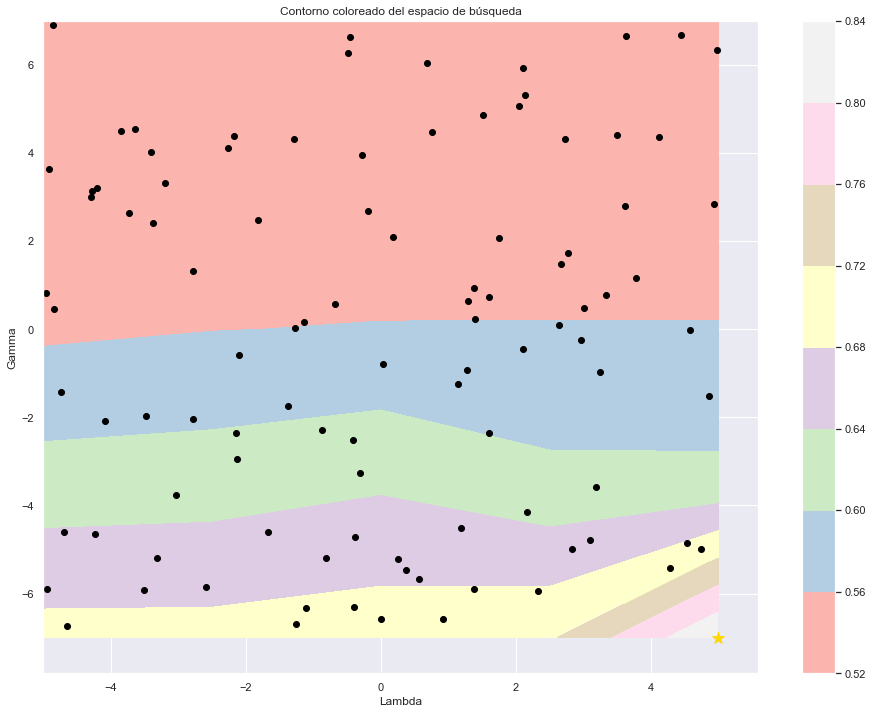

In [12]:
#búsqueda aleatoria

C, G = np.meshgrid(lambdas, gammas)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape), cmap=plt.cm.Pastel1)
plt.colorbar(cp)
plt.title('Contorno coloreado del espacio de búsqueda')
plt.xlabel('Lambda')
plt.ylabel('Gamma')
for p in range(100):
    px = np.random.uniform(lambdas.min(), lambdas.max())
    py = np.random.uniform(gammas.min(), gammas.max())
    plt.plot(px, py, marker='o', color='black')
plt.scatter(optima[0], optima[1], marker='*', c='gold', s=150)
plt.show()